# ***Proyecto final***

*Encuesta satisfaccion de clientes de una aerolinea*

---



In [ ]:
# Importacion de las librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# Lectura del archivo
df = pd.read_csv("/content/Encuesta satisfaccion aerolinea.csv", sep=';')

# Visualizacion de las 3 primeras filas del archivo
df.head(3)

In [ ]:
#Eljo una paleta de colores predeterminada
color = 'Spectral_r' # set palette color (from PALETTE_COLOR)
sns.set_palette(color) # set palette

# ***Data Wrangling***
*Información de la base de datos*

---

In [ ]:
# Tamaño del archivo
print('El archivo tiene ' + str(df.shape[0]) + ' filas y ' + str(df.shape[1]) + ' columnas')

In [ ]:
# Identificacion de tipos de variables y el recuento de no nulos 
df.info()

In [ ]:
# Visualizacion de las columnas
df.columns

In [ ]:
# Eliminacion de los campos indispensables y renombre de la columna Leg room service
df2 = df.drop(['Unnamed: 0', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Departure/Arrival time convenient'], axis=1)
df2 = df2.set_index('id', drop=True, append=False, inplace=False) #Pongo el id como indice
df2.rename(columns={'Leg room service':'Seat space'}, inplace=True) #Cambio los nombres de las columnas
df2.head(3)

In [ ]:
# Visualizacion de las columnas del nuevo data frame
print(df2.columns)
print('')
print('El archivo tiene ' + str(df2.shape[0]) + ' filas y ' + str(df2.shape[1]) + ' columnas')

In [ ]:
# Agrupacion de campos por tipo de dato
col_numerica = ['Age', 'Flight Distance', 'Inflight wifi service', 'Ease of Online booking',
'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort','Inflight entertainment', 'On-board service', 'Seat space', 
'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

col_categorica = ['Gender', 'Customer Type', 'Type of Travel','Class','satisfaction']

variables= ['Inflight wifi service', 'Ease of Online booking', 'Gate location','Food and drink', 'Online boarding','Seat comfort','Inflight entertainment',  
'On-board service', 'Seat space', 'Baggage handling','Checkin service', 'Inflight service', 'Cleanliness'] # Se asignan todos los campos requeridos a una unica variable

In [ ]:
# Descripcion de las variables numericas
df2[col_numerica].describe().T

In [ ]:
# Visualizacion del recuento de respuestas
for x in variables:
   frecuencia_valores = df2[x].value_counts()
   print(frecuencia_valores)

2    6490
3    6317
4    4981
1    4488
5    2887
0     813
Name: Inflight wifi service, dtype: int64
2    6030
3    5944
4    4873
1    4361
5    3573
0    1195
Name: Ease of Online booking, dtype: int64
3    7140
4    6040
2    4837
1    4429
5    3530
Name: Gate location, dtype: int64
4    6204
5    5644
3    5494
2    5395
1    3214
0      25
Name: Food and drink, dtype: int64
4    7706
3    5313
5    5307
2    4429
1    2569
0     652
Name: Online boarding, dtype: int64
4    7991
5    6688
3    4632
2    3632
1    3033
Name: Seat comfort, dtype: int64
4    7368
5    6331
3    4745
2    4331
1    3197
0       4
Name: Inflight entertainment, dtype: int64
4    7836
5    5844
3    5709
2    3670
1    2915
0       2
Name: On-board service, dtype: int64
4    7097
5    6238
2    5015
3    4958
1    2542
0     126
Name: Seat space, dtype: int64
4    9378
5    6747
3    5219
2    2841
1    1791
Name: Baggage handling, dtype: int64
4    7278
3    7007
5    5264
1    3218
2    3209
Name: Che

In [ ]:
# Descripcion de las variables categoricas
df2[col_categorica].describe().T

,count,unique,top,freq
Gender,25976,2,Female,13172
Customer Type,25976,2,Loyal Customer,21177
Type of Travel,25976,2,Business travel,18038
Class,25976,3,Business,12495
satisfaction,25976,2,neutral or dissatisfied,14573


In [ ]:
# Revision de valores misssings o nulos 
df2.isnull().sum()

Gender                    0
Customer Type             0
Age                       0
Type of Travel            0
Class                     0
Flight Distance           0
Inflight wifi service     0
Ease of Online booking    0
Gate location             0
Food and drink            0
Online boarding           0
Seat comfort              0
Inflight entertainment    0
On-board service          0
Seat space                0
Baggage handling          0
Checkin service           0
Inflight service          0
Cleanliness               0
satisfaction              0
dtype: int64

# ***Análisis de la base de datos***

---

*Analisis univariado*

---



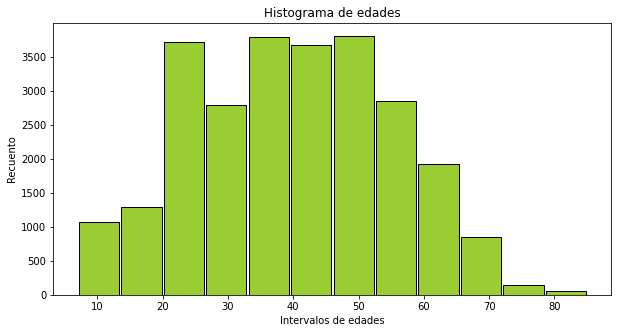

In [ ]:
# Distribucion de edades
datos = df2['Age'] #asignacion de la columna edad a una variable
datos_norm = datos.values.flatten() #normalizacion de los datos
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(datos_norm, bins=12, rwidth=0.95, edgecolor='black', color='yellowgreen') # se grafican los valores 
ax.set_title('Histograma de edades') #se pone titulo al grafico
ax.set_xlabel('Intervalos de edades') #se pone nombre al eje x
ax.set_ylabel('Recuento') #se pone nombre al eje x
plt.savefig('Customed Plot.pdf', dpi=300, bbox_inches='tight') #Guardamos el grafico

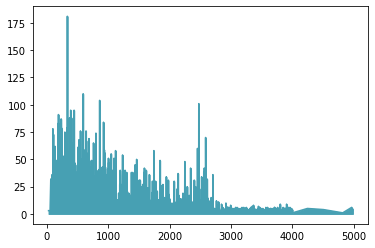

In [ ]:
# Distancia de vuelos
df2['Flight Distance'].value_counts().sort_index().plot.area() # Se cuentan los vuelos que tienen misma distancia y se grafica

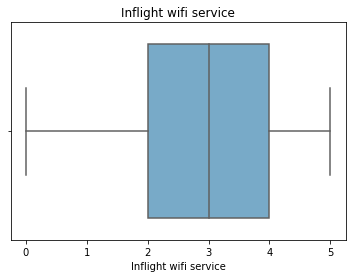

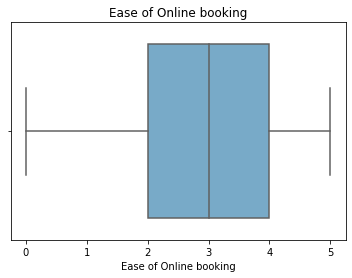

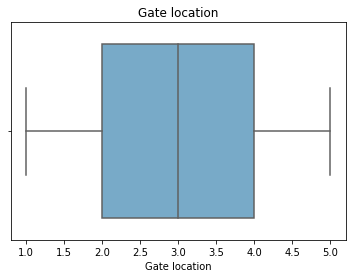

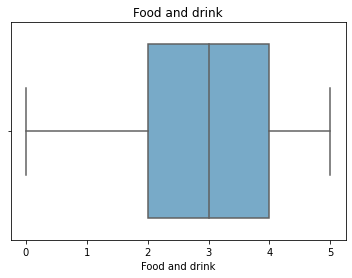

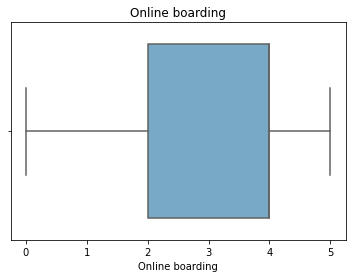

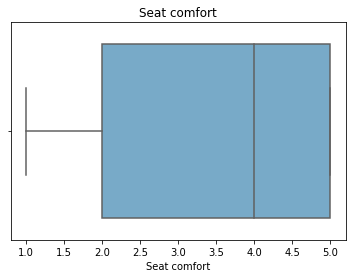

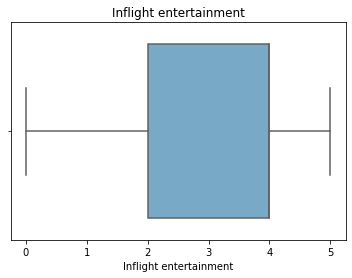

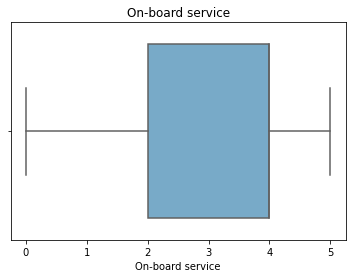

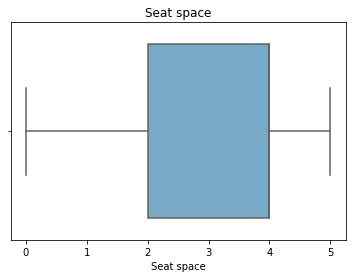

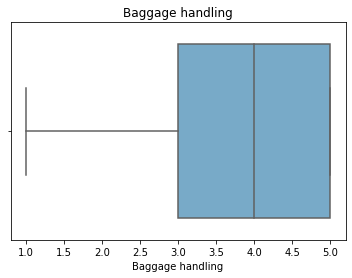

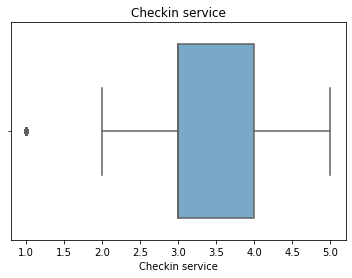

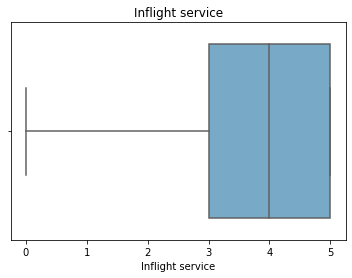

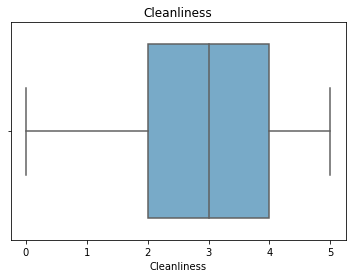

In [ ]:
# Analisis de todos los parametros de la encuesta
for x in variables: # Funcion for para iterar sobre todos los campos
  plt.title(df2[x].name) # Asignacion de titulo al grafico
  sns.boxplot(x=df2[x], palette='Blues'); # Asignacion de color y variable al grafico box plot
  plt.show() # Para mostrar todos los graficos

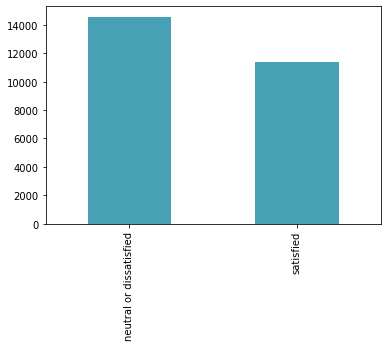

In [ ]:
# Visualizacion de la satisfaccion
df2['satisfaction'].value_counts().sort_index().plot(kind ='bar')

*Analisis bivariado*

---



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


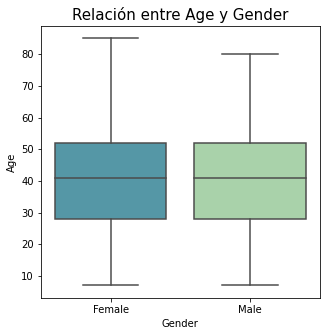

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


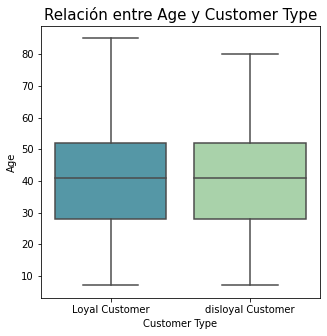

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


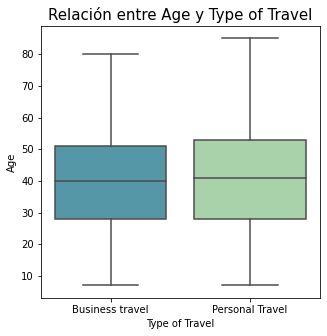

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


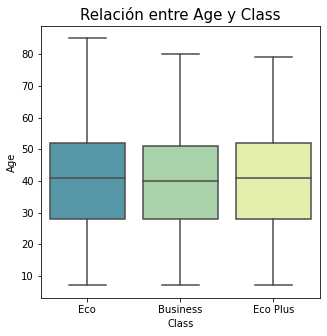

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


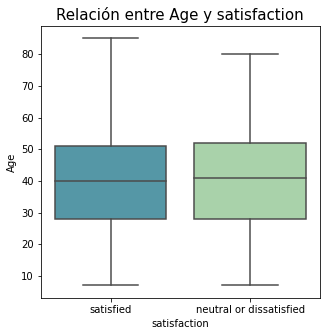

In [ ]:
# Se visualiza la relacion entre la edad y otras variables categoricas
col_categorica = ['Gender', 'Customer Type', 'Type of Travel','Class', 'satisfaction'] # Se asignan todos los campos requeridos a una unica variable
for x in col_categorica: # Se arma un for para analizar todas los campos de la nueva variable creada
   plt.figure(figsize=(5,5)) # Se fija el tamaño de grafico
   sns.boxplot(df2[x], df['Age']) # Se grafica un campo de la nueva variable contra el campo Edad
   plt.title('Relación entre Age y ' + str(df[x].name), fontsize = 15) # Se agrega el titulo al grafico
   plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


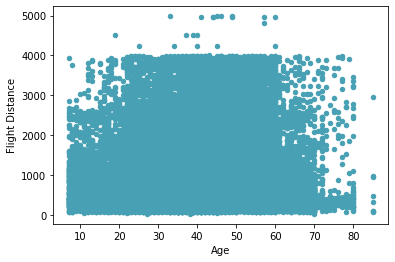

In [ ]:
# Relacion entre edad y longitud del vuelo
df2.plot.scatter(x='Age', y='Flight Distance')

*Analisis multivariado*

---



In [ ]:
# Visualizacion de la matriz de correlacion, en donde se busca encontrar alguna correlacion entre las variables de la encuesta
variables_vuelo= ['Inflight wifi service','Food and drink','Seat comfort','Inflight entertainment', 'Seat space', 'Inflight service', 'Cleanliness'] # Se asignan todos los campos requeridos a una unica variable

plt.figure(dpi = 100,figsize= (5,3)) # Se asigna el tamaño de la figura
mask = np.triu(np.ones_like(df2[variables_vuelo].corr(),dtype = bool)) # Se seleccionan solo los datos debajo de la diagonal del mapa con la funcion triu 
sns.heatmap(df2[variables_vuelo].corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'Spectral') # Se grafica el mapa de calor
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Mapa de correlación') # Se agrega titulo al mapa
plt.show() # Se visualiza el mapa

In [ ]:
# Visualizacion de la relacion entre Flight Distance y Age a traves del target clase
df2_2=df2.loc[:, ['Age','Class','Flight Distance']] # Se seleccionan los campos requeridos del data frame
sns.pairplot(df2_2,hue = 'Class', palette = 'Spectral', kind="kde") # Se grafica en pairplot con el target clase para trazar relaciones por pares entre las variables edad y distancia de vuelo

In [ ]:
# Visualizacion de la relacion entre Flight Distance y Age a traves del target tipo de cliente
sns.FacetGrid(df2, hue = 'Customer Type' , size = 5).map(plt.scatter,'Age','Flight Distance').add_legend(); 
plt.show() # Se visualiza el mapa

# ***Algoritmos de clasificación***

---



In [ ]:
#Importo las librerías
from sklearn import datasets

*KNN*

---

In [ ]:
#Asigno los valores de X e y utilizando el tipo de cliente y la clase en el vuelo como features y la satisfaccion como target
X = df2[variables]
y = df2['satisfaction']

In [ ]:
#Separo el dataset en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training y 30% testing

In [ ]:
#Importo MinMaxScaler para escalear los conjuntos de entrenamiento
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Importo la librería para el algoritmo de clasificación
from sklearn.neighbors import KNeighborsClassifier

#Utilizo la tecnica de tecnica de Grid Search para validar el K óptimo
k_range = range(1, 20)
scores_train= []
scores_test= []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski')
    knn.fit(X_train, y_train)
    scores_train.append(knn.score(X_train, y_train))
    scores_test.append(knn.score(X_test, y_test))
plt.figure(figsize=(15,8))
plt.plot(k_range, scores_train, color='yellowgreen', linestyle='dashed', marker='o',markerfacecolor='yellowgreen', markersize=10)
plt.plot(k_range, scores_test, color='powderblue', linestyle='dashed', marker='o',markerfacecolor='powderblue', markersize=10)
plt.title('K neighbours vs Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

In [ ]:
#el valor minimo optimo de vecinos es k = 3 que llega a una Accuracy del 89% para la data de Testing
n_neighbors = 3

#Consideraer que la distancia entre vecinos es con el parametro 'metric'probemos con otras distancia Minkowski 
knn = KNeighborsClassifier(n_neighbors, metric = 'minkowski')
knn.fit(X_train, y_train)

print('Accuracy Train: {:.2f}'
      .format(knn.score(X_train, y_train)))
print('Accuracy Test: {:.2f}'
      .format(knn.score(X_test, y_test)))

Accuracy Train: 0.94
Accuracy Test: 0.89


In [ ]:
#Creo la variable de predicción en función de la respuesta del test
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [ ]:
#Creamos la matriz de confusión para KNN
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_test_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[4043  360]
 [ 499 2891]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


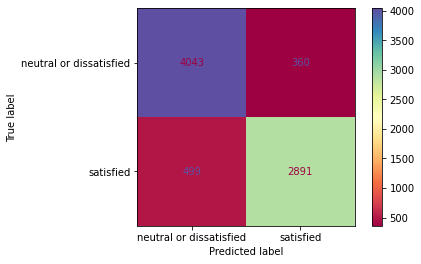

In [ ]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score
plot_confusion_matrix(knn, 
                      X = X_test, 
                      y_true = y_test, 
                      colorbar=True, 
                      cmap='Spectral')

*Arbol de decision*

---

In [ ]:
#Asigno los valores de X e y utilizando el tipo de cliente y la clase en el vuelo como features y la satisfaccion como target
X = df2[variables]
y = df2['satisfaction']

In [ ]:
#Separo el dataset en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training y 30% testing

In [ ]:
#Invoco el clasificador para el albol de decision
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

#Entreno el clasificador
classifier.fit(X_train, y_train)

#Creo la variable de predicción en función de la respuesta del test
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

In [ ]:
#Creamos la matriz de confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_test_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[4008  395]
 [ 342 3048]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


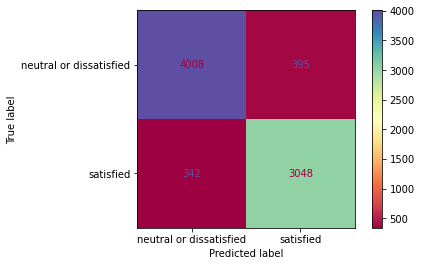

In [ ]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score
plot_confusion_matrix(classifier, 
                      X = X_test, 
                      y_true = y_test, 
                      colorbar=True, 
                      cmap='Spectral')

In [ ]:
# Me fijo el accuracy del modelo
from sklearn import metrics
Accuracy_Train = metrics.accuracy_score(y_train, y_train_pred)
Accuracy_Test = metrics.accuracy_score(y_test, y_test_pred)                               
print("Accuracy Train:",Accuracy_Train)
print("Accuracy Test:",Accuracy_Test)

Accuracy Train: 0.9976901501402409
Accuracy Test: 0.9054279481586038


*Random Forest*

In [ ]:
# Importamos las librerias que vamos a utilizar
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import urllib.request

In [ ]:
# Creamos el random forest y lo entrenamos con las variables de entrenamiento
model_rd = RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced", max_features="log2")
model_rd.fit(X_train, y_train)

# Realizamos una predicción con la variable de test
Y_test_pred_rd = model_rd.predict(X_test) 

#Calculamos la precision del random forest
test_accuracy_rd = accuracy_score(y_test, Y_test_pred_rd)

print('% de aciertos sobre el set de evaluación:',test_accuracy_rd)
print("")
print('El random forest es ' + str(test_accuracy_rd-Accuracy_Test) + '% mas preciso que el arbol de decision simple')

% de aciertos sobre el set de evaluación: 0.9327601693827794

El random forest es 0.027332221224175557% mas preciso que el arbol de decision simple


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


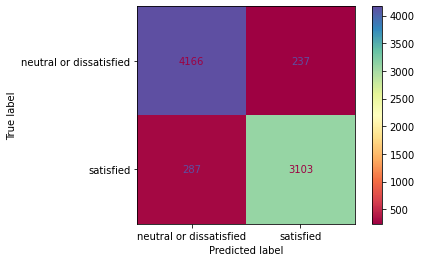

In [ ]:
#Grafico la matriz de confusion
plot_confusion_matrix(model_rd, 
                      X = X_test, 
                      y_true = y_test, 
                      colorbar=True, 
                      cmap='Spectral')